
<h1>Feature Extraction From Amezon Reviews</h1>
    <h3>This project focusses on the following areas</h3>
    <ul>
        <li>Analysis of the dataset</li>
        <li>Understanding of the User's Review Distribution</li>
        <li>Feature extracton</li>
    </ul>

<h3>Approach</h3>
    <h4>1. Clean the Dataset</h4>
    <ul>
        <li>Clean Columns</li>
        <li>Clean Reviwes</li>
     </ul>
    <h4>2. Analysis of Data</h4>
    <h4>3. Transforming Date Time </h4>
     <ul>
         <li>Parse ReviewDate</li>
     </ul>

In [9]:
import pandas as pd
import numpy as np
import spacy
import string
import nltk
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [10]:
def getData(path):
    """
    import Your CSV file to dataframe
    :param path: Path of csv File
    :return: Pandas data frame object
    """
    # data = pd.read_csv('/home/aniket/Downloads/test.csv')
    df = pd.read_csv(path)
    return df


<h1>Clean Data</h1>
<ul>
    <li>Drop Unwanted columns</li>
    <li>Check and remove null values</li>
</ul>

In [11]:
def cleanData(df):
    df = df.drop(['Unnamed: 0'], axis=1)
    df.drop(df[df['Reviews'].isnull()].index.tolist())
#     df.drop(df[df['Reviews'].isnull()].index.tolist())
    index = findIdx(df,"[^a-zA-Z0-9 ']")
    df = df.drop(index[0][1:])
    df['Stars']=df['Stars'].str.split(' ',expand=True)[0]
    df['Stars']=df['Stars'].astype(float)
    df['Date']=pd.to_datetime(df['Date'], errors='coerce')
    return df

In [12]:
def findIdx(df,pattern):
    return df.apply(lambda x: x.str.match(pattern)).values.nonzero()

<h1>Clean Review column</h1>
<ul>
    <li>Delete White spaces</li>
    <li>Remove punctuations</li>
    <li>Lower Case</li>
    <li>Remove Stop Words</li>
</ul>

In [13]:
def remove_punctuation(text):
    no_pun= "".join(i for i in text if i  not in string.punctuation)
    return no_pun

In [14]:
def remove_stopwords(text):
    words = [k for k in text if k not in stopwords.words('english')]
    return words

In [15]:
def lemmatization(data):
    lemmatizer = WordNetLemmatizer() 
    for i in data["Reviews"]:
        for j in i:
            j=lemmatizer.lemmatize(j) 

In [16]:
def clean_review(data):
    data['Reviews']=data['Reviews'].replace(to_replace='[" "]', value=' ', regex=True)
    data["Reviews"] = data["Reviews"].apply(lambda x:remove_punctuation(x))
    data["Reviews"] = data["Reviews"].str.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    data["Reviews"] = data["Reviews"].apply(lambda x: tokenizer.tokenize(x))
    data["Reviews"] = data["Reviews"].apply(lambda x: remove_stopwords(x))
    lemmatization(data)
    return data


In [17]:
path = '/home/aniket/Downloads/Apple-iPhone-XR-.csv'
df = getData(path)
df['Stars']
df = cleanData(df)
df.to_csv('ProjectCleanData.csv')
df = clean_review(df)

In [18]:
df

,Date,Name,Reviews,Stars
0,2018-12-12,Sameer Patil,"[note, detailed, comparison, iphone, 8, x, xs,...",3.0
1,2018-11-17,Amazon Customer,"[bad, experience, iphone, xr, phone, back, cam...",1.0
2,2019-01-27,A,"[amazing, phone, amazing, camera, coming, ipho...",5.0
3,2019-05-02,Shubham Dutta,"[got, iphone, xr, today, product, looks, amazi...",1.0
4,2019-05-24,Nepuni Lokho,"[ive, android, user, life, decided, try, iphon...",5.0
...,...,...,...,...
4674,2019-09-30,Chethan,"[fabulous, phone]",5.0
4675,2019-09-30,rahul c,"[fingerprint, reader, camera, quality, battery...",5.0
4676,2019-08-22,Suraj Kumar,[nice],5.0
4677,2019-08-14,Sanjay Singh,"[best, budget, iphone, buy, market, right, dis...",5.0


<h1>Exploratory Data Analysis</h1>
    <p>Exploring maximum words that appered in reviews using word cloud</p>

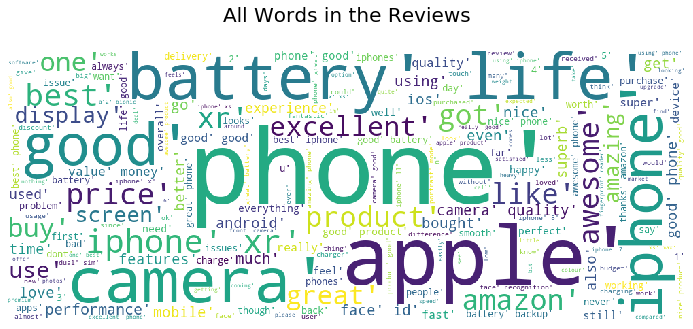

In [19]:
rt = df["Reviews"]
wordcloud = WordCloud(background_color='white',
                      width=1000,
                      height=400
                     ).generate(" ".join((str(v) for v in rt)))
plt.figure(figsize=(30,5))
plt.imshow(wordcloud)
plt.title('All Words in the Reviews\n',size=20)
plt.axis('off')
plt.show()

<h1>Rating Count Visualization</h1>
<p>Count rating of product to get idea about reviews</p>

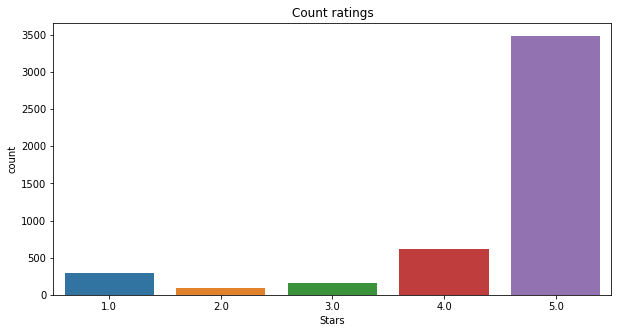

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(df['Stars'])
plt.title('Count ratings')
plt.show()

/home/aniket/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


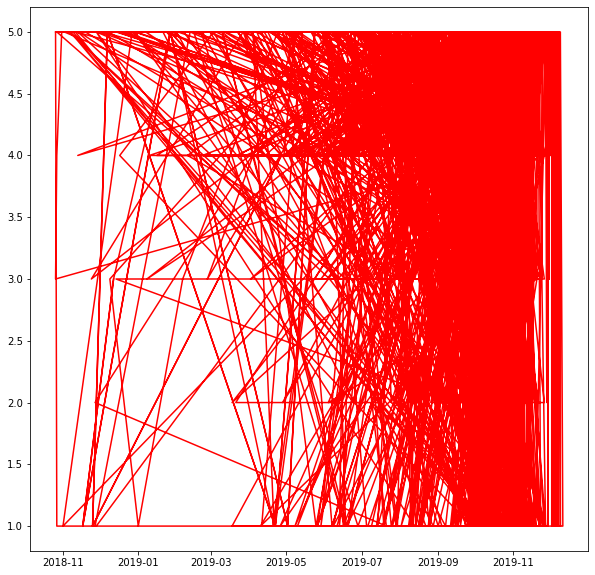

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add the x-axis and the y-axis to the plot
ax.plot(df['Date'],
        df['Stars'],
        color='red')

In [22]:
count=df['Date'].groupby(pd.DatetimeIndex(df['Date']).month).agg('count')
month=np.unique(pd.DatetimeIndex(df['Date']).month)

In [23]:
count

Date
1       20
2       23
3       33
4       54
5       92
6      189
7      305
8      424
9      319
10    1427
11    1571
12     179
Name: Date, dtype: int64

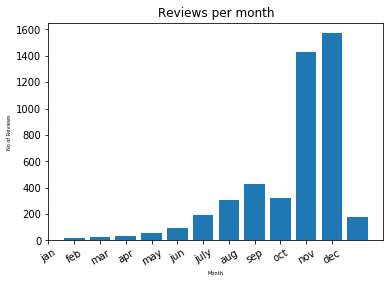

In [24]:

# this is for plotting purpose
index = np.arange(12)
label = ('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'july', 'aug', 'sep', 'oct', 'nov', 'dec')
plt.bar(month, count)
plt.xlabel('Month', fontsize=5)
plt.ylabel('No of Reviews', fontsize=5)
plt.xticks(index, label, fontsize=10, rotation=30)
plt.title('Reviews per month')
plt.show()

In [25]:
df

,Date,Name,Reviews,Stars
0,2018-12-12,Sameer Patil,"[note, detailed, comparison, iphone, 8, x, xs,...",3.0
1,2018-11-17,Amazon Customer,"[bad, experience, iphone, xr, phone, back, cam...",1.0
2,2019-01-27,A,"[amazing, phone, amazing, camera, coming, ipho...",5.0
3,2019-05-02,Shubham Dutta,"[got, iphone, xr, today, product, looks, amazi...",1.0
4,2019-05-24,Nepuni Lokho,"[ive, android, user, life, decided, try, iphon...",5.0
...,...,...,...,...
4674,2019-09-30,Chethan,"[fabulous, phone]",5.0
4675,2019-09-30,rahul c,"[fingerprint, reader, camera, quality, battery...",5.0
4676,2019-08-22,Suraj Kumar,[nice],5.0
4677,2019-08-14,Sanjay Singh,"[best, budget, iphone, buy, market, right, dis...",5.0


<h2>Getting Count of each word </h2>
  <ul>
    <li>Collect all data in single variable<li>
    <li>Convert into dictionary</li>
    <li>Count frequency</li>
   </ul>

In [26]:
# all_words = {}
# for i in df.Reviews:
#     for k in i:
#         all_words.update({k:1})
all_words = []
for i in df.Reviews:
    for k in i:
        all_words.append(k)

In [27]:
# for word in all_words:
#     if word in all_words.keys():
#             # if yes, increment the count
#            all_words[word] += 1
#     else:
#             # if no, then add the word with count = 1
#             all_words[word] = 1

    

In [28]:
count_of_words = {}
SetOfWords = set(all_words)
for i in SetOfWords:
    l = all_words.count(i)
    count_of_words.update({i:l})

In [29]:
count_of_words

{'fellow': 2,
 'outstanding': 22,
 'blowing': 3,
 'laughs': 1,
 'satyajitswain': 1,
 'release': 6,
 'prev': 1,
 'decent': 23,
 'daughter': 3,
 'delivering': 6,
 'batterypacking': 1,
 'niceee': 1,
 'sharpthat': 1,
 'maxexcept': 1,
 'havent': 9,
 'bcuz': 1,
 'destroyed': 1,
 'obcrse': 1,
 'course': 6,
 'cool': 23,
 'portrait': 78,
 'separatelythanks': 1,
 '3755': 1,
 'waterproofing': 1,
 'players': 1,
 'rs37999': 1,
 'refuse': 2,
 'superlike': 1,
 'greats': 1,
 '52k': 7,
 'brainer': 1,
 'thoughtsiphone': 1,
 'regrets': 5,
 'packs': 2,
 '30m': 1,
 'cases': 1,
 'workair': 1,
 'pull': 3,
 'camerathe': 1,
 'thnx': 1,
 'met': 4,
 'bw': 3,
 'ad': 2,
 'basic': 6,
 'recordingno': 1,
 '2face': 1,
 'poor': 33,
 'validatedafter': 1,
 'dimension': 1,
 'efficient': 9,
 'compares': 1,
 'bombs': 1,
 'fare': 1,
 'non': 11,
 'lags': 11,
 'netflix': 5,
 'official': 3,
 'discounted': 5,
 'anxiety': 1,
 'sell': 10,
 'ai': 3,
 'finance': 1,
 'reviewsits': 1,
 'awesomeand': 1,
 'avoid': 4,
 'read': 9,
 'engli

In [30]:
{k: v for k, v in sorted(count_of_words.items(), key=lambda item: item[1])}

{'laughs': 1,
 'satyajitswain': 1,
 'prev': 1,
 'batterypacking': 1,
 'niceee': 1,
 'sharpthat': 1,
 'maxexcept': 1,
 'bcuz': 1,
 'destroyed': 1,
 'obcrse': 1,
 'separatelythanks': 1,
 '3755': 1,
 'waterproofing': 1,
 'players': 1,
 'rs37999': 1,
 'superlike': 1,
 'greats': 1,
 'brainer': 1,
 'thoughtsiphone': 1,
 '30m': 1,
 'cases': 1,
 'workair': 1,
 'camerathe': 1,
 'thnx': 1,
 'recordingno': 1,
 '2face': 1,
 'validatedafter': 1,
 'dimension': 1,
 'compares': 1,
 'bombs': 1,
 'fare': 1,
 'anxiety': 1,
 'finance': 1,
 'reviewsits': 1,
 'awesomeand': 1,
 'english': 1,
 'yrsfor': 1,
 'flavour': 1,
 'excellentthanks': 1,
 'featuresbut': 1,
 'compensating': 1,
 'rs42000': 1,
 'nsndnx': 1,
 'exception': 1,
 'suck': 1,
 'inspired': 1,
 'random': 1,
 'tip': 1,
 'eith': 1,
 'crappy': 1,
 'woooooow': 1,
 'menu': 1,
 'permission': 1,
 'goin': 1,
 'hiddencamera': 1,
 '42900rs': 1,
 'minimizing': 1,
 'sums': 1,
 'netwrk': 1,
 'okbut': 1,
 'necessity': 1,
 'amazonplease': 1,
 'prevented': 1,
 'x2

In [31]:
count_of_words = {k: v for k, v in sorted(count_of_words.items(), key=lambda item: item[1])}

In [32]:
for x in list(reversed(list(count_of_words)))[0:10]:
    print (x)

phone
good
iphone
battery
camera
product
apple
xr
best
life


In [36]:
df.isna().sum()

Date       0
Name       0
Reviews    0
Stars      0
dtype: int64